In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


x=pd.read_csv('datasets/x_opening.csv')
y=x['worldwide_gross']
x=x.drop('worldwide_gross', axis=1)
y.value_counts()


3.317508e+07    3
1.185376e+08    2
4.903591e+08    2
1.110527e+09    2
5.246102e+07    2
               ..
2.638946e+08    1
3.923549e+07    1
4.984382e+08    1
2.376851e+08    1
2.899970e+06    1
Name: worldwide_gross, Length: 2190, dtype: int64

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
model= DecisionTreeRegressor(max_depth=2)
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=1)
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [3]:
import graphviz
from sklearn.tree import export_graphviz

In [4]:
treedot=export_graphviz(model,
                       out_file=None,
                       feature_names=x.columns)


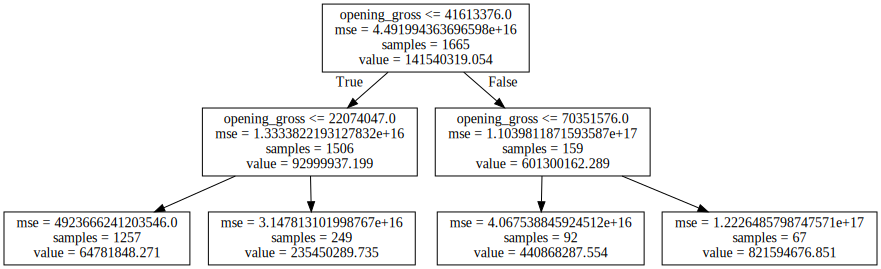

In [5]:
graphviz.Source(treedot)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest=RandomForestRegressor(200)
results=cross_validate(forest,x,y,cv=5,scoring='r2')


In [7]:
results

{'fit_time': array([2.04125333, 2.16636491, 2.1186769 , 2.05406404, 2.1287868 ]),
 'score_time': array([0.02696538, 0.03298116, 0.03196979, 0.03198171, 0.02896428]),
 'test_score': array([0.480509  , 0.68801274, 0.560445  , 0.3985373 , 0.4247261 ])}

In [8]:
test_scores=results['test_score']

print(np.mean(test_scores))

0.51044602990227


# Algoritmo  Gradient Boosting Trees Regressor

In [9]:

from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results=(cross_validate(ensemble,x,y,cv=5,scoring='r2'))
results

{'fit_time': array([0.3193295 , 0.29783368, 0.30121326, 0.31386566, 0.31194401]),
 'score_time': array([0.00199962, 0.00199962, 0.00199413, 0.00199914, 0.00199914]),
 'test_score': array([0.45162383, 0.67688632, 0.59938207, 0.46402097, 0.42382735])}

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,random_state=1)

In [11]:
from sklearn.model_selection import GridSearchCV

param_test1={'n_estimators':range(20,501,20)}
param_test1

{'n_estimators': range(20, 501, 20)}

In [12]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [13]:
estimator= GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10
                                    )

In [14]:
gsearch1=GridSearchCV(estimator,
                      param_grid=param_test1,
                      scoring='r2',
                      cv=5                     
                     )


In [15]:
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [18]:
gsearch1.cv_results_['mean_test_score'], gsearch1.best_params_, gsearch1.best_score_

(array([0.65533772, 0.71947072, 0.73472393, 0.73893391, 0.74204852,
        0.74593224, 0.74954068, 0.75081976, 0.75256545, 0.7534906 ,
        0.75456927, 0.75530597, 0.75517149, 0.75388522, 0.75460231,
        0.75250064, 0.75350086, 0.75354341, 0.75258576, 0.75254213,
        0.75185592, 0.75205363, 0.7515657 , 0.75050616, 0.75096087]),
 {'n_estimators': 240},
 0.7553059694284988)

In [21]:
final_results=cross_validate(gsearch1.best_estimator_,x_train,y_train)
final_results

{'fit_time': array([0.32483268, 0.30782485, 0.31881785, 0.35779738, 0.3887589 ]),
 'score_time': array([0.00299859, 0.00399852, 0.00299811, 0.0050149 , 0.00299811]),
 'test_score': array([0.70503564, 0.66126336, 0.84330169, 0.79674271, 0.77018645])}

In [22]:
estimator= GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=240
                                    )

In [23]:
estimator.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
estimator.score(x_test,
                y_test)

0.8092888852563106